<a href="https://colab.research.google.com/github/GIRISH2409/PM/blob/main/Demand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install EasyPreProcessing

In [3]:
import numpy as np
import pandas as pd
from easypreprocessing import EasyPreProcessing
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import math
import scipy.stats as stats

In [4]:
prep = EasyPreProcessing('train.csv')


**Initialization Parameters**

1.  output            - Set output variable/dependent variable
2.  dates.features    - Set datetime field names (optional)

For example:
1.  output = 'column_name'
2.  dates.features = ['date_field_1','date_field_2']
        

In [5]:
prep.info



**General Template**
<code>
from easypreprocessing import EasyPreProcessing
prep = EasyPreProcessing('filename_here.csv')
prep.df
prep.output = 'output_variable_here'
prep.remove_blank()
prep.missing_values
prep.categorical.impute()
prep.numerical.impute()
prep.categorical.encode()
prep.correlation()
prep.standardize()
X_train, X_test, y_train, y_test = prep.split()
</code>


**Categorical Preprocessing**
<table>
<tr>
<td>categorical.fields</td><td>Display all categorical field names</td>
</tr>
<tr>
<td>categorical.unique</td><td>Display unique/distinct categorical values</td>
</tr>
<tr>
<td>categorical.impute()</td><td>Handle categorical missing values. Parameters {'mean', 'medium', 'mode'}</td>
</tr>
<tr>
<td>categorical.encode()</td><td>Encode categorical features. Parameters {'le': LabelEncoding, 'ohe': OneHotEncoding}</td>
</tr>
</table>

**Numerical Preprocessing**
<table>
<tr>
<td>numerical.fields</td><td>Display all numerical field names</td>
</tr>
<tr>
<td>numerical.impute()</td><td>Handle numerical missing values. Parameters {'mean', 'medium', 'mode'}</td>
</tr>
</table>

**Date Preprocessing**
<table>
<tr>
<td>dates.features</td><td>Define list of all datetime feature names</td>
</tr>
<tr>
<td>dates.split_datetime()</td><td>Split all datetime features into discrete fields (Year, Month, Day, Hour, Minute)</td>
</tr>
</table>

**General Preprocessing**
<table>
<tr>
<td>missing_values</td><td>Display missing value report</td>
</tr>
<tr>
<td>remove_blank()</td><td>Remove empty/blank columns</td>
</tr>
<tr>
<td>correlation()</td><td>Display correlation heatmap</td>
</tr>
<tr>
<td>standardize()</td><td>Standardize entire dataset except dependent variable</td>
</tr>
<tr>
<td>encode_output()</td><td>Encode dependent feature/output variable</td>
</tr>
<tr>
<td>over_sample()</td><td>Oversample dataset. Parameters {'smote': SMOTE, 'ros': RandomOverSample}</td>
</tr>
<tr>
<td>clustering.apply()</td><td>Cluster dataset using elbow plot</td>
</tr>
</table>
        

In [6]:
prep.categorical.fields


['week']

In [7]:
prep.numerical.fields

['record_ID',
 'store_id',
 'sku_id',
 'total_price',
 'base_price',
 'is_featured_sku',
 'is_display_sku',
 'units_sold']

In [8]:
prep.missing_values

record_ID          0
week               0
store_id           0
sku_id             0
total_price        1
base_price         1
is_featured_sku    1
is_display_sku     1
units_sold         1
dtype: int64

In [9]:
prep.numerical.impute()

Numerical features imputated successfully.


In [10]:
prep.df


,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1.0,17/01/11,8091.0,216418.0,99.037500,111.862500,0.0000,0.00000,20.000000
1,2.0,17/01/11,8091.0,216419.0,99.037500,99.037500,0.0000,0.00000,28.000000
2,3.0,17/01/11,8091.0,216425.0,133.950000,133.950000,0.0000,0.00000,19.000000
3,4.0,17/01/11,8091.0,216233.0,133.950000,133.950000,0.0000,0.00000,44.000000
4,5.0,17/01/11,8091.0,217390.0,141.075000,141.075000,0.0000,0.00000,52.000000
...,...,...,...,...,...,...,...,...,...
101111,143125.0,18/09/12,9425.0,223245.0,213.037500,213.037500,0.0000,0.00000,18.000000
101112,143126.0,18/09/12,9425.0,223153.0,212.325000,212.325000,0.0000,0.00000,17.000000
101113,143129.0,18/09/12,9425.0,245338.0,355.537500,469.537500,0.0000,0.00000,23.000000
101114,143131.0,18/09/12,9425.0,679023.0,178.125000,213.037500,0.0000,1.00000,15.000000


In [11]:


prep.dataset['key'] = prep.df['week'].astype(str) + '_' + prep.df['store_id'].astype(str) 


In [12]:
prep.dataset = prep.df.drop(['record_ID', 'week', 'store_id', 'sku_id', 'total_price', 'base_price', 'is_featured_sku', 'is_display_sku'], axis=1)


In [13]:
prep.dataset = prep.df.groupby('key').sum()

In [14]:
prep.df

,units_sold
key,
01/05/12_8023.0,2965.0
01/05/12_8058.0,881.0
01/05/12_8063.0,746.0
01/05/12_8091.0,603.0
01/05/12_8094.0,1354.0
...,...
31/10/11_9890.0,531.0
31/10/11_9909.0,551.0
31/10/11_9954.0,431.0


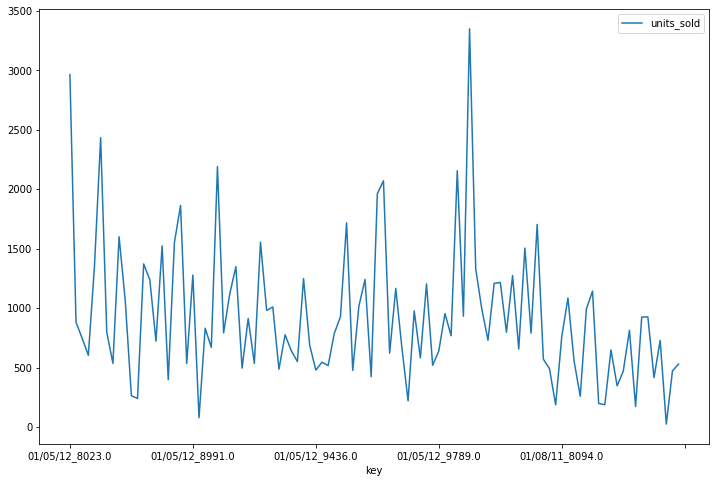

In [15]:
prep.df[:100].plot(figsize=(12,8))

In [16]:
prep.df['day_1'] = prep.df['units_sold'].shift(-1)
prep.df['day_2'] = prep.df['units_sold'].shift(-2)
prep.df['day_3'] = prep.df['units_sold'].shift(-3)
prep.df['day_4'] = prep.df['units_sold'].shift(-4)

In [17]:
df = prep.df.dropna()

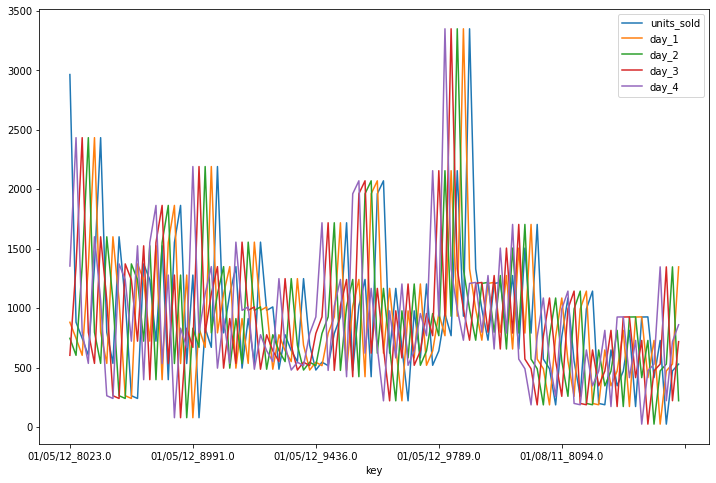

In [18]:
df[:100].plot(figsize=(12,8))


In [19]:
x1, x2, x3, x4, y = df['day_1'], df['day_2'], df['day_3'], df['day_4'], df['units_sold']
x1, x2, x3, x4, y = np.array(x1), np.array(x2), np.array(x3), np.array(x4), np.array(y)
x1, x2, x3, x4, y = x1.reshape(-1,1), x2.reshape(-1,1), x3.reshape(-1,1), x4.reshape(-1,1), y.reshape(-1,1)

split_percentage = 15
test_split = int(len(df)*(split_percentage/100))
x = np.concatenate((x1, x2, x3, x4), axis=1)
X_train,X_test,y_train,y_test = x[:-test_split],x[-test_split:],y[:-test_split],y[-test_split:]

In [20]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5653, 4)
(997, 4)
(5653, 1)
(997, 1)


In [23]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)

y_pred = rf_regressor.predict(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


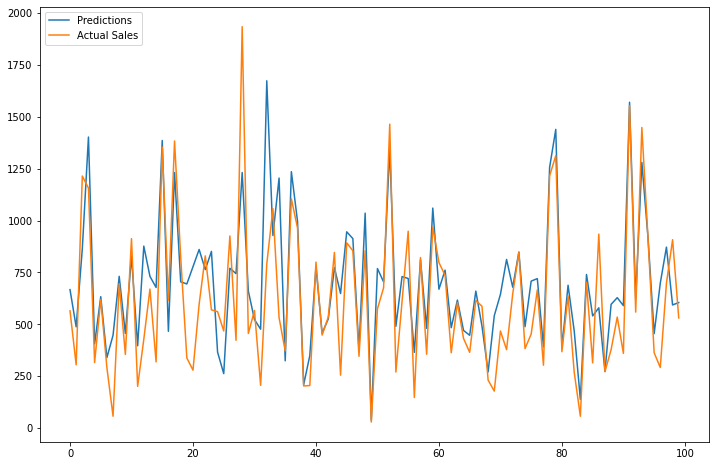

In [24]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(y_pred[-100:], label='Predictions')
plt.plot(y_test[-100:], label='Actual Sales')
plt.legend(loc="upper left")
plt.show()

In [25]:
import xgboost
xgb_regressor = xgboost.XGBRegressor()
xgb_regressor.fit(X_train, y_train)

y_pred = xgb_regressor.predict(X_test)

[04:01:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


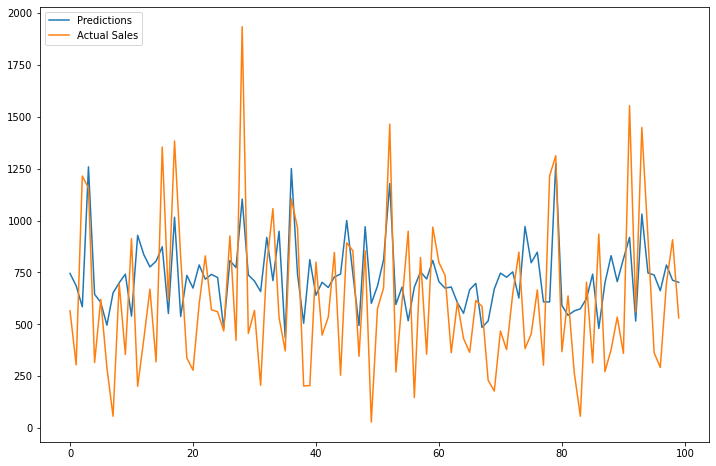

In [26]:
import matplotlib.pyplot as plt
plt.plot(y_pred[-100:], label='Predictions')
plt.plot(y_test[-100:], label='Actual Sales')
plt.legend(loc="upper left")
plt.show()
